# Predicting Heart Disease Using Machine Learning 
-------------------------------------------------

This notebook provides an end-to-end workflow for predicting heart disease using the UCI/Cleveland dataset. It covers data loading and cleaning, exploratory analysis, feature engineering, model training (logistic regression, random forest, KNeighborsClassifier), evaluation, and interpretation to identify key risk factors.

* The following approach will be used:
1. Problem definiton
2. Data 
3. Evaluation
4. Features
5. Data Preprocessing and EDA
6. Feature Engineering
7. Modeling 
8. Conclusions & Future Improvements

## 1. Problem Definition 

> Given clinical parameters about a patient, can we predict wether or not they have heart disese? 

----------------------------

## 2. Dataset: 
* The original data came from the Cleavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

* There is also a version of it available on Kaggle:  https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease?resource=download

-------------------------------

## 3. Evaluation
> If we can reach 95% accuracy at predicting wether a pacient has heart disease during the proof of concept, we'll pursue the project 

----------------------

## 4. Features 
### Data Dictionary:

| Feature    | Description |
|------------|-------------|
| **age**        | Age in years |
| **sex**        | Sex (1 = male; 0 = female) |
| **cp**         | Chest pain type:<br>0: Typical angina (chest pain related to decreased blood supply)<br>1: Atypical angina (not heart-related)<br>2: Non-anginal pain (usually esophageal spasms)<br>3: Asymptomatic (no chest pain) |
| **trestbps**   | Resting blood pressure (mm Hg on admission); >130-140 is cause for concern |
| **chol**       | Serum cholesterol in mg/dl; >200 is cause for concern |
| **fbs**        | Fasting blood sugar >120 mg/dl (1 = true; 0 = false); '>126' signals diabetes |
| **restecg**    | Resting electrocardiographic results:<br>0: Normal<br>1: ST-T wave abnormality<br>2: Left ventricular hypertrophy |
| **thalach**    | Maximum heart rate achieved |
| **exang**      | Exercise induced angina (1 = yes; 0 = no) |
| **oldpeak**    | ST depression induced by exercise relative to rest (measures heart stress during exercise) |
| **slope**      | Slope of the peak exercise ST segment:<br>0: Upsloping (better heart rate with exercise)<br>1: Flat (minimal change)<br>2: Downsloping (signs of unhealthy heart) |
| **ca**         | Number of major vessels (0-3) colored by fluoroscopy (more is better) |
| **thal**       | Thalium stress test result:<br>1,3: Normal<br>6: Fixed defect (used to be defect, now okay)<br>7: Reversible defect (no proper blood movement during exercise) |
| **target**     | Heart disease (1 = yes, 0 = no) |



## Importing the required libraries 
  I will use pandas and numpy for data manipulation, matplotlib and seaborn for visualization, scikit-learn for modeling and evaluation

In [43]:
# Data manipulation and visualization
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle   # For saving the model


import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

In [44]:
# Load the dataset
df = pd.read_csv('data/heart-disease.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 5. Data Preprocessing and EDA
> Clean data, handle missing values, convert types, and apply scaling/encoding as required.
> Perform exploratory data analysis in order to uncover patterns and gain insights of the data.

--------------------------
* In this exploratory data analysis, I'll investigate the heart disease dataset to discover patterns and relationships that can inform my modeling approach. My analysis will focus on:

### 5.1 Data Quality Analysis
* Check for missing values and outliers
* Examine data types and value ranges
* Identify potential data cleaning needs

### 5.2 Disease Distribution
* Analyze heart disease prevalence
* Check class balance in target variable
* Understand disease patterns across demographics

### 5.3 Patient Demographics Study
* Age distribution analysis
* Gender-based patterns
* Age-gender interaction effects

### 5.4 Clinical Indicators Review
* Blood pressure and cholesterol distributions
* Heart rate patterns
* Chest pain type analysis
* Exercise test results

### 5.5 Feature Correlations
* Create correlation heatmap
* Identify strongest predictors
* Examine feature interactions

The insights from this analysis will guide my feature engineering and modeling decisions in the next sections.

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
print("Missing values: \n", df.isnull().sum())

Missing values: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [48]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates if any
if duplicates > 0: 
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset size: {df.shape}")

Number of duplicate records: 1
Duplicates removed. New dataset size: (302, 14)


In [50]:
# Check class balance for the target variable
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

target
1    164
0    138
Name: count, dtype: int64
target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


# Insigts 
- The dataset has 302 unique records with no missing values (1 duplicated row removed from 303 original records)
- All the columns have appropriate data types (13 integer columns, 1 float column)
- Target class distribution: 165 patients with heart disease (54.6%) and 137 without (45.4%), indicating a well-balanced dataset

* There are no immediate data quality issues and the majority of the values seem to be within range

In [51]:
# Outlier detection and visualization 
from IPython.display import display
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# quantile-based outlier detection
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    if not outliers.empty:
        print(f"{feature}: {len(outliers)} outliers")
        display(df.loc[outliers.index])

trestbps: 9 outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


chol: 5 outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


thalach: 1 outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


oldpeak: 5 outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


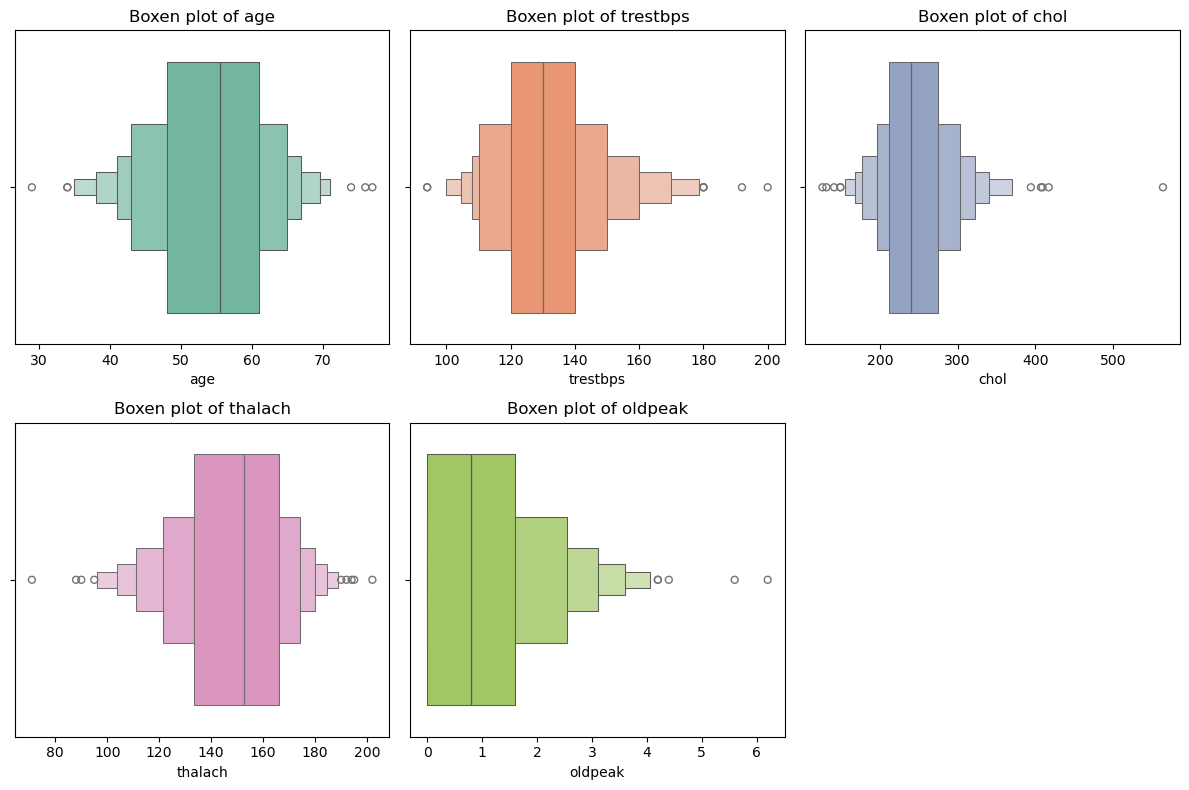

In [53]:
colors = sns.color_palette("Set2", len(numeric_features))
# Boxen plot for each numeric feature 
plt.figure(figsize=(12, 8)) 
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(x=df[feature], color=colors[i-1]) 
    plt.title(f'Boxen plot of {feature}')
plt.tight_layout()  
plt.show()

# Insights from outlier analysis

Summary of what I found (IQR rule)
- trestbps: 9 outliers (values roughly 172–200). High but clinically plausible for hypertensive patients.
- chol: 5 outliers (values roughly 394–564). Very high cholesterol — plausible (severe/familial cases).
- thalach: 1 outlier (71). Low maximum heart rate on exercise — clinically meaningful.
- oldpeak: 5 outliers (values ~4.2–6.2). Large ST-depression values — likely clinically important.

What these outliers mean (outlier-only perspective)
- None of the flagged rows show obvious data-entry errors (no impossible values). They look like extreme but valid clinical observations.
- Several outliers (chol, oldpeak, some trestbps) co-occur with positive target labels — they may carry predictive signal rather than noise.

Low-risk handling  
- Outliers are not dropped, as they are clinically plausible and may be informative for prediction. 

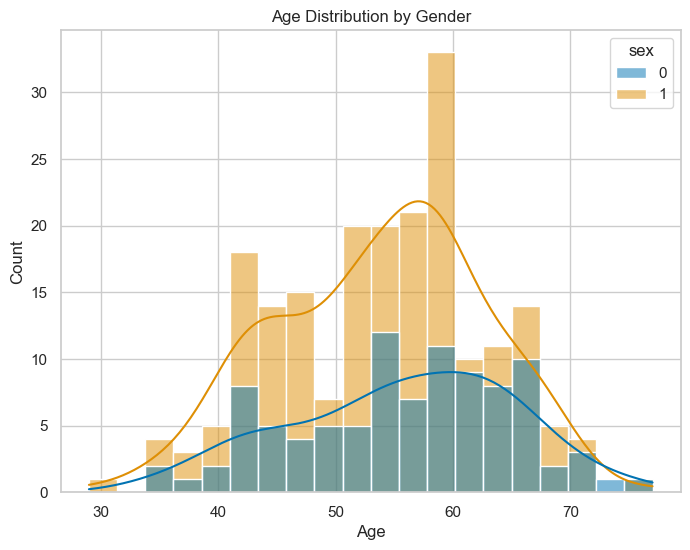

In [54]:
# Set default seaborn style
sns.set(style="whitegrid", palette="colorblind")


# Age distribution by gender 
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='sex', bins=20, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')   
plt.ylabel('Count')
plt.show()

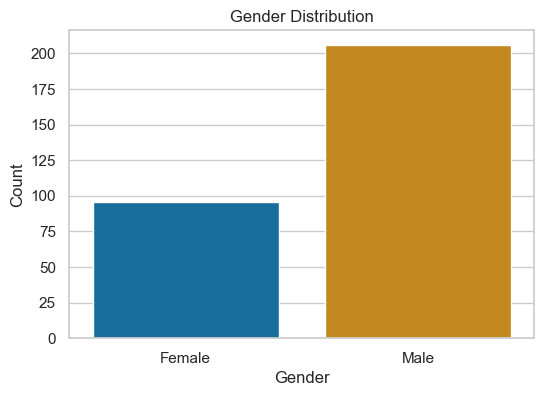

In [55]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='colorblind') 
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()  

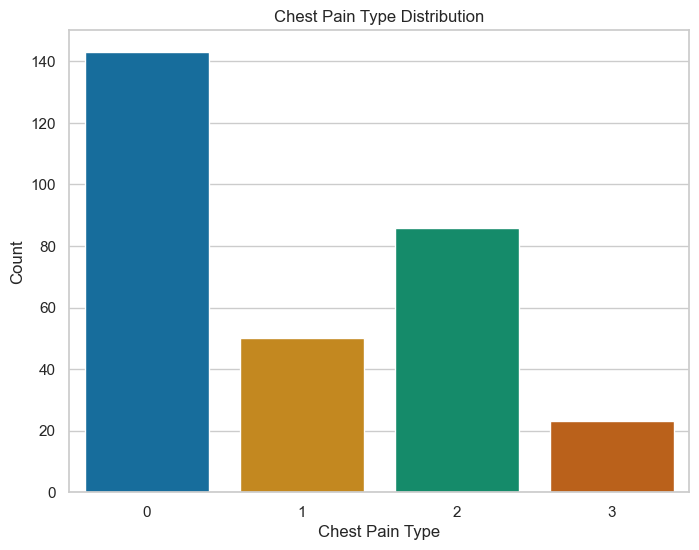

In [56]:
# Chest pain type distribution
plt.figure(figsize=(8,6))
sns.countplot(x='cp', data=df, palette='colorblind')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

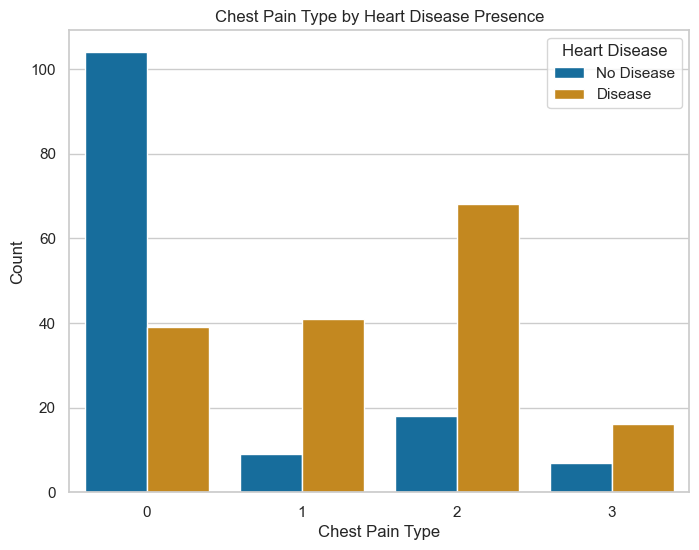

In [57]:
# Chest pain type by target
plt.figure(figsize=(8,6))   
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type by Heart Disease Presence')  
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


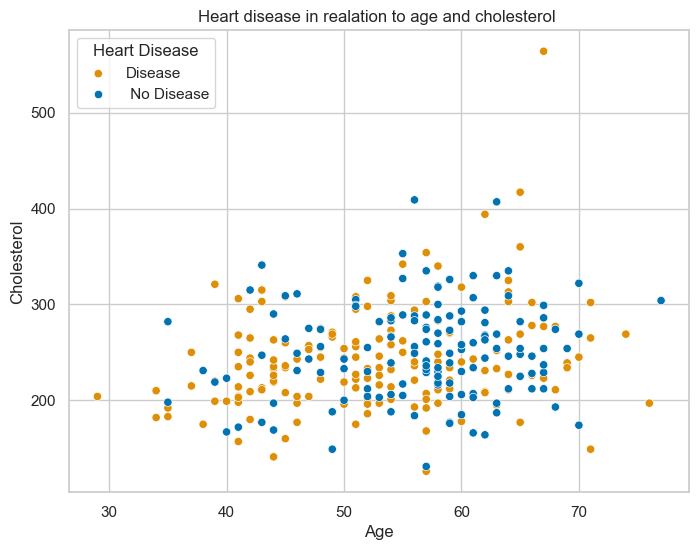

In [58]:
# Cholesterol and age vs target variable 
plt.figure(figsize=(8, 6))
sns.scatterplot(y='chol', x='age', data=df, hue='target')

plt.title("Heart disease in realation to age and cholesterol ")
plt.ylabel('Cholesterol')
plt.xlabel('Age')

plt.legend(title='Heart Disease', labels=['Disease', ' No Disease'], loc='upper left')
plt.show()  

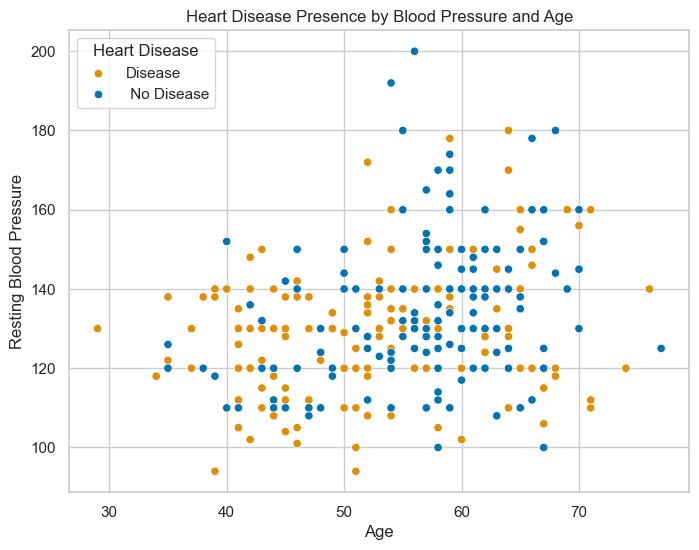

In [59]:
# Blood pressure by age vs Heart disease presence
plt.figure(figsize=(8,6))   
sns.scatterplot(x='age', y='trestbps', hue='target', data=df, palette='colorblind')
plt.title('Heart Disease Presence by Blood Pressure and Age')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

plt.legend(title='Heart Disease', labels=['Disease', ' No Disease'], loc='upper left')
plt.show()

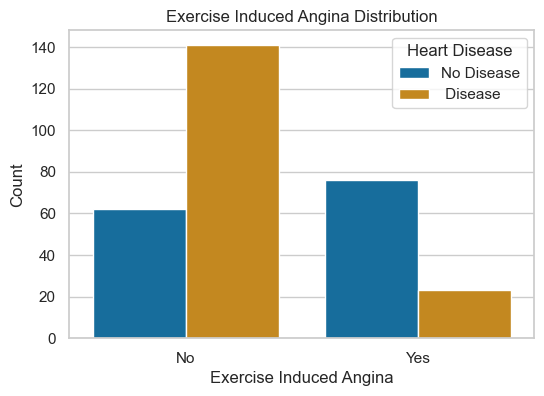

In [60]:
# Exercise induced angina vs target variable
plt.figure(figsize=(6,4))
sns.countplot(x='exang', hue='target', data=df, palette='colorblind')     
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend(title='Heart Disease', labels=['No Disease', ' Disease'], loc='upper right') 
plt.show()

### Heart disease frequency by gender

In [61]:
# Compare target column with sex column 
ct = pd.crosstab(df['target'], df['sex'], margins=True)
display(ct)

risk_female = ct.loc[1, 0] / ct.loc['All', 0] * 100
risk_male = ct.loc[1, 1] / ct.loc['All', 1] * 100

print(f"Females have a higher risk of heart disease ({risk_female:.1f}%) than males ({risk_male:.1f}%).")

sex,0,1,All
target,,,
0,24,114,138
1,72,92,164
All,96,206,302


Females have a higher risk of heart disease (75.0%) than males (44.7%).


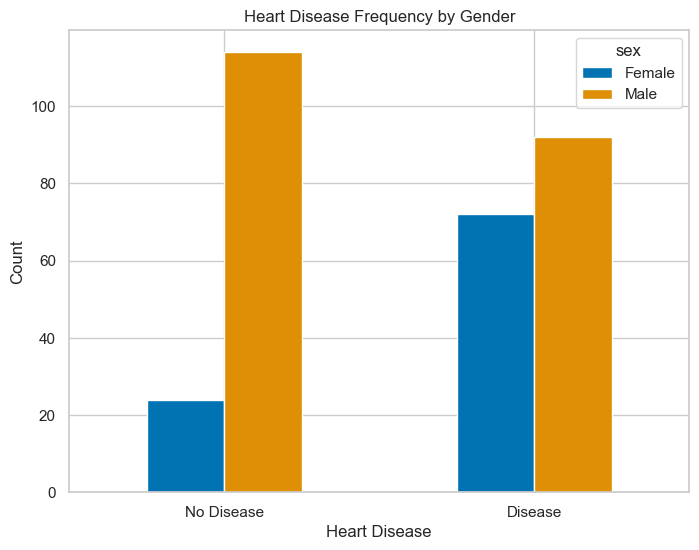

In [62]:
# Countplot using the cross tabulated data
pd.crosstab(df['target'], df['sex']).plot(
    kind='bar', figsize=(8,6), color=sns.color_palette('colorblind'))

plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='sex', labels=['Female', 'Male'])   
plt.xticks([0,1], ['No Disease', 'Disease'], rotation=0)
plt.show()


In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


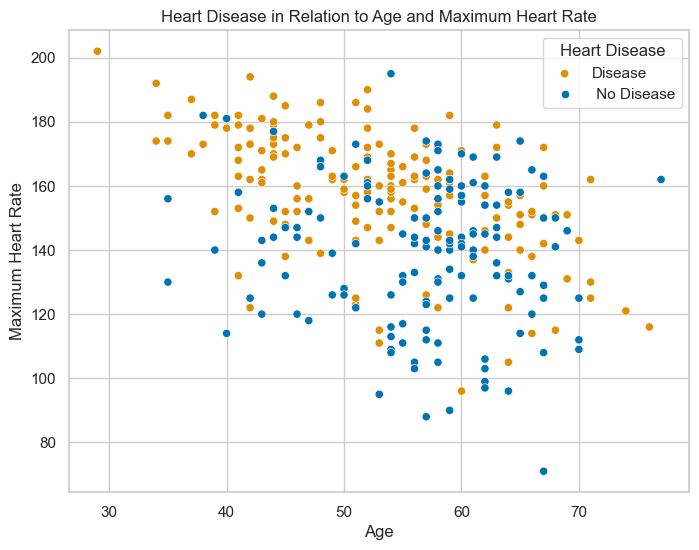

In [64]:
# Age vs. Maximum Heart Rate by target
plt.figure(figsize=(8,6))   
sns.scatterplot(
    x='age', 
    y='thalach', 
    hue='target', 
    data=df, 
    palette='colorblind'
)

plt.title('Heart Disease in Relation to Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Heart Disease', labels=['Disease', ' No Disease'])
plt.show()

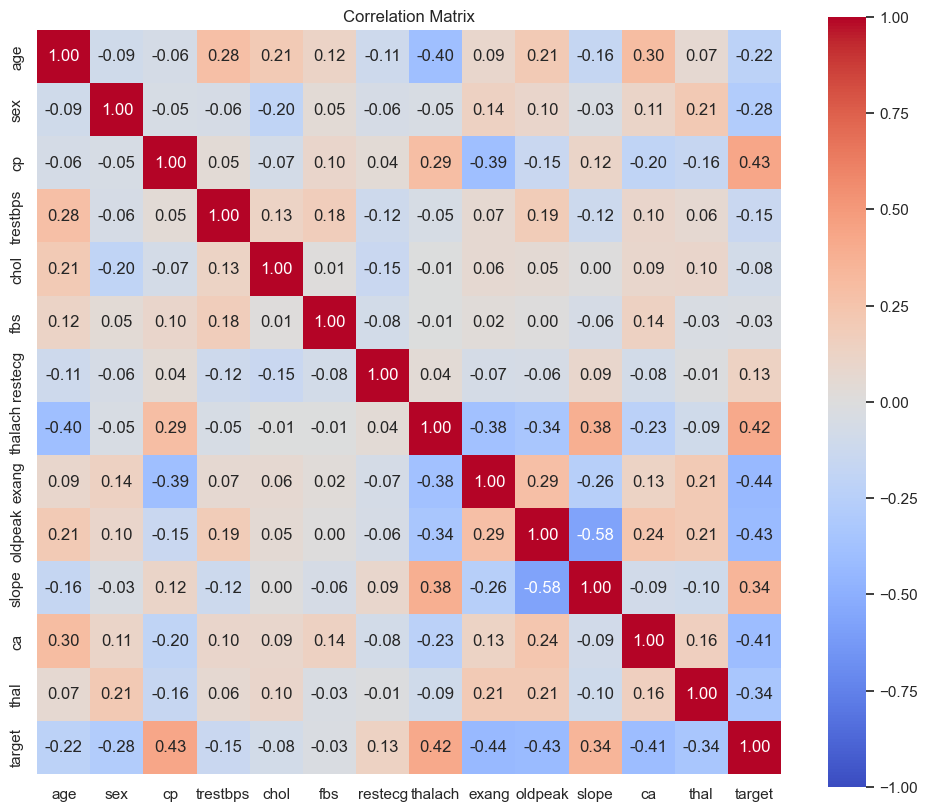

In [65]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1,fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


# Insights 
- `Age` - ranges from young (29) to elderly (77)
- `Sex`- mix of *male* (1) and *female* (0) with a dominance records of male patients. The *female* patients being more prone to heart disease (75%), than *males* (44.7%).
- `Chest pain types (cp)` - variuos represented (0-3), dominated by typical Angyna (0)
- `Cholesterol (chol)` - shows wide variation, being positively carrelated with heart disease presence
- `Blood pressure (trestbps)` – ranges from normal to elevated, with a maximum value of 200, which can be considered an outlier
- `Heart rates (thalach)` – varies considerably, decreasing with age; showing a positive correlation with hear disease presence.
- Some patients have exercise-induced angina (1), but the vast majority don't (0). The rate of heart disease presence in patients with induced angina is considerably lower.


## 7. Modeling & Evaluation 
> Train baselines and candidate models for KNN, RandomForestClassifier & LogisticRegression


In [66]:
# Set random seed for reproducibility
np.random.seed(42)

# Feature-target split
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(241, 13) (61, 13) (241,) (61,)


In [67]:
# Create a dictionary to store the estimators
model_dict = {"KNN": KNeighborsClassifier(),
              "RandomForestClassifier": RandomForestClassifier(),
              "LogisticRegression": LogisticRegression()}

model_scores = {}

# Function to train and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    Parameters:
    models (dict): A dictionary of model name and instantiated model pairs.
    X_train (DataFrame): Training features.
    X_test (DataFrame): Testing features.
    y_train (Series): Training target.
    y_test (Series): Testing target.
    
    Returns:
    dict: A dictionary with model names as keys and their accuracy scores as values.
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test)
        model_scores[name] = score
    
    return model_scores

In [68]:
# Train and evaluate the models
model_scores = fit_and_score(model_dict, X_train, X_test, y_train, y_test)
model_scores

{'KNN': 0.6557377049180327,
 'RandomForestClassifier': 0.8688524590163934,
 'LogisticRegression': 0.8524590163934426}

## 8. Experimentation & Tuning 
> Run targeted hyperparameter searches to improve and validate robustness.
 ----------------------------- 

* Based on the scores I got from the baseline estimators, I will proceed forword with Logistic Regression and Random Forest Classifier, hence KNN performed the lowest between the three of them, I will not continue to improve this estimator.

In [73]:
# Create grid search parameter grids for Logistic Regression and Random Forest Classifier using RandomizedSearchCV
rs_log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

rs_rf_grid = {
    'n_estimators': np.arange(100, 2000, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 7, 12],
    'min_samples_split': [3, 4, 7, 10], 
    'min_samples_leaf': [3, 5, 7, 10, 4],
}
    

# Instantiate RandomizedSearchCV for Logistic Regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=rs_log_reg_grid,
    n_iter=20,
    cv=5,
    verbose=True,
    n_jobs=-1,
    random_state=42
)
# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

print(f"Best hyperparameters for Logistic Regression: {rs_log_reg.best_params_}")    
print(f"Best cross-validation score for Logistic Regression: {rs_log_reg.best_score_:.4f}")
print("RandomizedSearch Logistic Regression score:", rs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'C': np.float64(0.615848211066026)}
Best cross-validation score for Logistic Regression: 0.8549
RandomizedSearch Logistic Regression score: 0.8360655737704918


In [74]:
rs_random_forest = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rs_rf_grid,
    n_iter=20,
    cv=5,
    verbose=True,
    n_jobs=-1,
    random_state=42
)   

# Fit random hyperparameter search model for Random Forest Classifier
rs_random_forest.fit(X_train, y_train)

print(f"Best hyperparameters for Random Forest: {rs_random_forest.best_params_}")    
print(f"Best cross-validation score for Random Forest: {rs_random_forest.best_score_:.4f}")
print("RandomizedSearch Random Forest score:", rs_random_forest.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for Random Forest: {'n_estimators': np.int64(1680), 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 12}
Best cross-validation score for Random Forest: 0.8341
RandomizedSearch Random Forest score: 0.8688524590163934


## Model Performance Evaluation
* The tuned RandomForestClassifier model perfored the same as the baseline model.
* The tuned LogisticRegression model performed slightly worse than the baseline model.

### Next Steps
* Use GridSearchCV for more exhaustive hyperparameter tuning for the Random Forest estimator, since it performed the best so far.

In [76]:
# grid search parameters for Random Forest Classifier 
rf_grid = {
    'n_estimators': np.arange(10, 200, 50), 
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV for Random Forest Classifier 
gs_random_forest = GridSearchCV( 
    RandomForestClassifier(random_state=42), 
    param_grid=rf_grid, 
    cv=5, 
    verbose=True, 
    n_jobs=-1) 

# Fit grid hyperparameter search model for Random Forest Classifier 
gs_random_forest.fit(X_train, y_train) 
print(f"Best hyperparameters for Random Forest Classifier: {gs_random_forest.best_params_}") 
print(f"Best cross-validation score for Random Forest Classifier: {gs_random_forest.best_score_:.4f}") 
print("GridSearch Random Forest score:", f"{gs_random_forest.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': np.int64(110)}
Best cross-validation score for Random Forest Classifier: 0.8424
GridSearch Random Forest score: 0.8852


### The Grid Search tuning improved the model to an acuuracy of 88.5% (from 86.8% originally). Hence, I will proceed with the Grid Search Random Forest Classifier model for evaluation beyond accuracy.

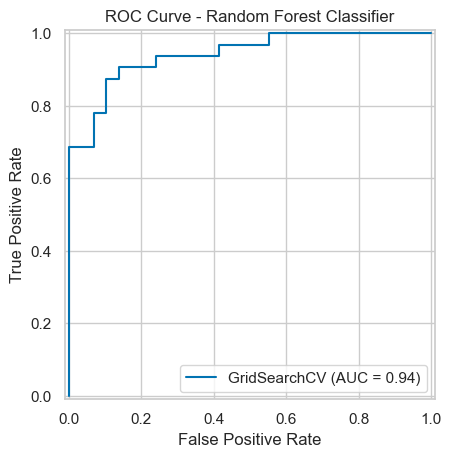

In [77]:
# Plot ROC curve and get AUC score
RocCurveDisplay.from_estimator(
    gs_random_forest,
    X_test,
    y_test
)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.show()

In [78]:
# predictions
y_preds = gs_random_forest.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

[[26  3]
 [ 4 28]]


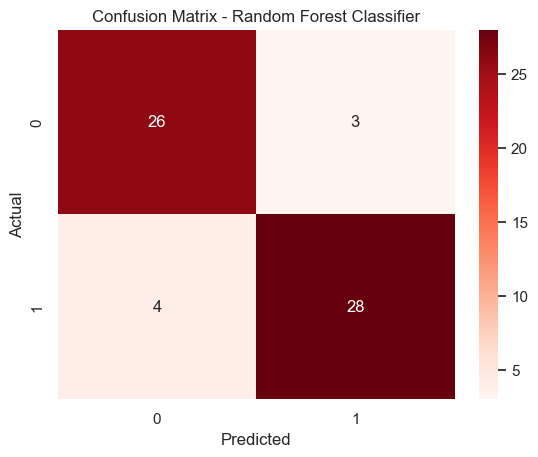

In [79]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* The AUC score is 0.94, indicating good model performance.
* The confusion matrix shows that the model made 25 true negative predictions and 28 true positive predictions, with 3 false positives and 4 false negatives.

In [80]:
# Precision, Recall, F1-Score, classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Calculating evaluation metrics with cross-validation

In [82]:
# Cross-validated metrics for Random Forest Classifie
cv_accuracy = cross_val_score(gs_random_forest, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(gs_random_forest, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(gs_random_forest, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(gs_random_forest, X, y, cv=5, scoring='f1') 
print(f"Cross-validated Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Cross-validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"Cross-validated F1-Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 7

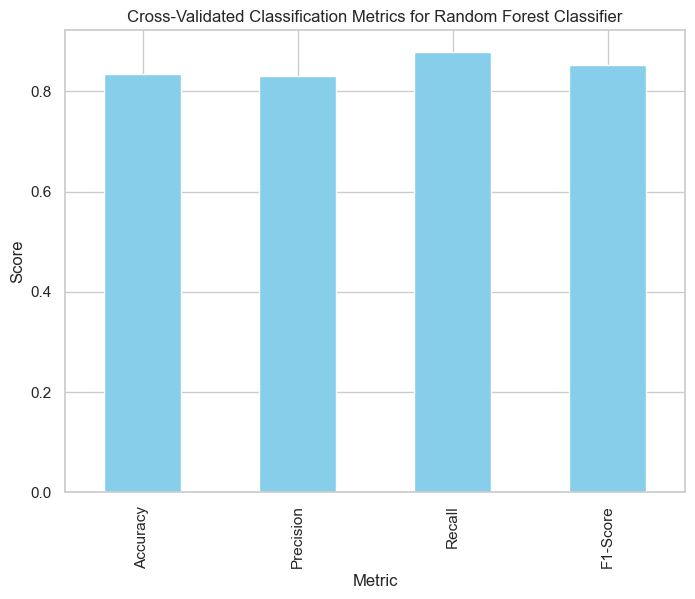

In [89]:
# Visualize the cross-validated metrics
metrics = {
    'Accuracy': cv_accuracy.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1-Score': cv_f1.mean()
}

metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.T.plot.bar(legend=False, color='skyblue', figsize=(8,6))
plt.title('Cross-Validated Classification Metrics for Random Forest Classifier')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

### Feature importance 
--------------------
> Which Features contributed the most to the outcomes of the model and how did they contribute?

In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


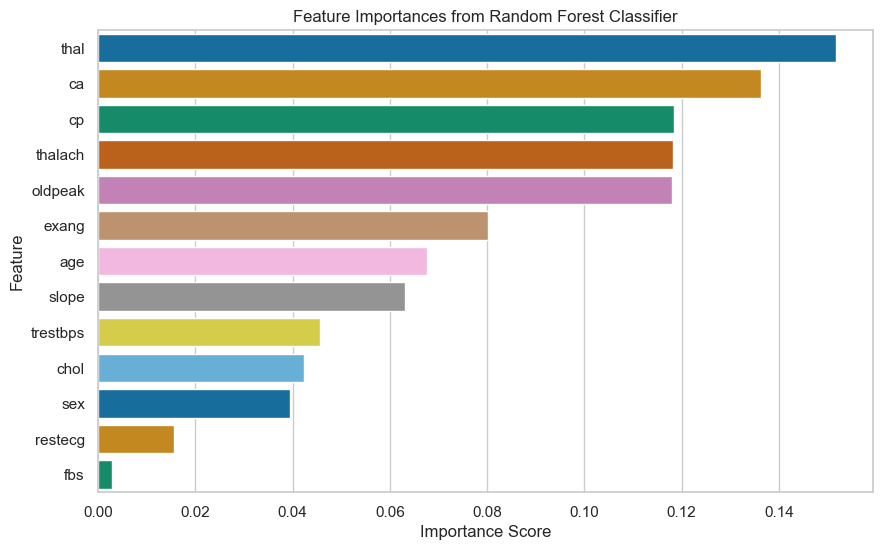

In [92]:
# Save the feature importances in a variable
feature_importances = gs_random_forest.best_estimator_.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], palette='colorblind')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## 8. Conclusions & Future Improvements
* The target accuracy of 95% was not achieved within the scope of the current experimentation and processes. The final accuracy secured provides a solid baseline but falls short of the predetermined objective.

To attain and surpass this performance in future iterations, the following strategic improvement directions are crucial and must be considered:
-------------------------

1. 🔍 Data Exploration and Expansion
Gathering of supplementary, relevant data to significantly increase the volume and diversity of the training set.

Conducting a more granular analysis of error cases (false positives/negatives) to identify and mitigate specific biases or deficiencies within the current data pool.

2. 🛠️ Advanced Feature Engineering
Testing new methods for feature extraction and selection, focusing on attributes with demonstrably higher predictive power.

Investigating advanced data transformation techniques (e.g., non-linear transformations, specialized normalization/standardization) to better prepare the data for modeling.

3. ⚙️ Model and Hyperparameter Refinement
Experimenting with alternative model architectures (e.g., more complex neural networks, state-of-the-art ensemble methods) that may better capture non-linear relationships in the data.

Implementing a more rigorous and systematic hyperparameter search (e.g., Bayesian Optimization ) to fine-tune the selected model architecture.

